## Time series prediction using RNN – stock market analysis or weather forecasting 

In [3]:
# !pip install yfinance

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense, Dropout


In [5]:
# Download Apple stock data (2015–2023)
df = yf.download("AAPL", start="2015-01-01", end="2024-12-31")
df = df[['Close']]
df.head()


C:\Users\shubh\AppData\Local\Temp\ipykernel_19060\277638208.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", start="2015-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,AAPL
Date,
2015-01-02,24.261049
2015-01-05,23.577572
2015-01-06,23.579798
2015-01-07,23.910435
2015-01-08,24.829124


In [6]:
df.describe()

Price,Close
Ticker,AAPL
count,2515.000000
mean,93.888059
std,65.444203
min,20.624044
25%,35.237463
50%,64.436157
75%,150.365356
max,258.103729


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2515 entries, 2015-01-02 to 2024-12-30
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Close, AAPL)  2515 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB


In [8]:
df.isnull().sum()

Price  Ticker
Close  AAPL      0
dtype: int64

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df)

# Create sequences
def create_sequences(data, seq_len=60):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len, 0])
        y.append(data[i+seq_len, 0])
    return np.array(X), np.array(y)

seq_len = 60
X, y = create_sequences(scaled_data, seq_len)

# Reshape for RNN [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Train-test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

len(X_train), len(X_test), len(y_train), len(y_test)

(1964, 491, 1964, 491)

In [10]:
model1 = Sequential([
    SimpleRNN(50, activation='tanh', return_sequences=True, input_shape=(seq_len,1)),
    Dropout(0.2),
    SimpleRNN(50, activation='tanh'),
    Dense(1)
])

model1.summary()


c:\Users\shubh\Downloads\AI ML\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 60, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,701 (30.08 KB)

 Trainable params: 7,701 (30.08 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model1.compile(optimizer='adam', loss='mean_squared_error')

history = model1.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(X_test, y_test),
    verbose=1
)


Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0837 - val_loss: 0.0153
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0054 - val_loss: 0.0188
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0030 - val_loss: 0.0085
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0019 - val_loss: 0.0055
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0016 - val_loss: 0.0095
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0015 - val_loss: 0.0091
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0010 - val_loss: 0.0066
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 8.2992e-04 - val_loss: 0.0083
Epoch 9/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 7.1734e-04 - val_loss: 0.0054
Epoch 10/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 5.7542e-04 - val_loss: 0.0069
Epoch 11/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 8.3779e-04 - val_loss: 0.0071
Epoch 12/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/

In [14]:
y_pred = model1.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred.reshape(-1,1))
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1,1))


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Evaluation metrics
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

print("Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")


Model Evaluation Metrics:
Mean Squared Error (MSE): 222.6845
Root Mean Squared Error (RMSE): 14.9226
Mean Absolute Error (MAE): 11.8189
R² Score: 0.6934


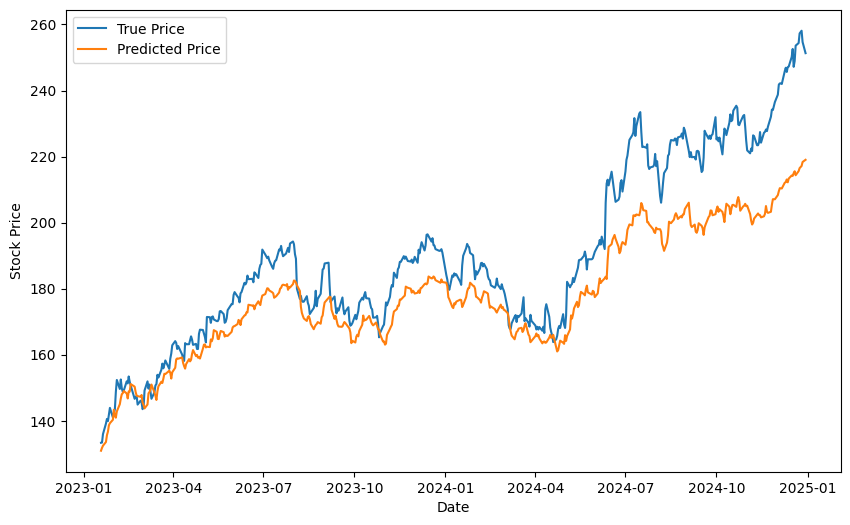

In [15]:
plt.figure(figsize=(10,6))
plt.plot(df.index[-len(y_test):], y_test_rescaled, label="True Price")
plt.plot(df.index[-len(y_test):], y_pred_rescaled, label="Predicted Price")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


c:\Users\shubh\Downloads\AI ML\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)